# Homework Assignment 3
## Regression models

### <p style="text-align: right;"> &#9989; Terry White</p>
### <p style="text-align: right;"> &#9989; whitete3.</p>

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, November 15th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 72 standard points possible in this assignment. The distribution of points can be found in the section headers**.


---
## Part 1: Git Branch (6 points)


For this assignment, you're going to add it to the `cmse202-f24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f24-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/whitete3/CMSE202-f24-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f24-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
## Part 2: Loading up on Portuguese Wine (13 points)


For this homework, you’ll be working with the Wine Quality dataset from the UCI Machine Learning Repository, which contains measurements of various chemical properties of red and white wines. The dataset includes properties like fixed acidity, volatile acidity, citric acid, and other measurements important for understanding wine characteristics. This data was collected to support predictive models of wine quality, based on a range of measurable attributes. The wine dataset is distributed into two files: 1) for red wines and 2) for white wines. 

While Parts 3, 4, and 5 are structured so that they can be completed independently of each other, it is recommended to finish Part 2 before moving on to these sections. To get started on Part 2, you’ll need to download the following file:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

and a description of the files here:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

✅ **Question 2.1 (1 point)**: Do this: Save the winequality-red.csv, winequality-white.csv,  file in the same directory as your notebook. Then, in the cell below, put the command line command(s) you used to download the file. If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

``` bash
# Put the command you used to download the wine dataests file here.
curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
```

curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

&#9989;  **Question 2.2 (4 points)**: Next, load the data of red and white wine into two separate Pandas DataFrames and display the first and last 5 rows. 

In [1]:
# Put your code here
import pandas as pd
red = pd.read_csv("winequality-red.csv", sep=';')
white = pd.read_csv("winequality-white.csv", sep=';')
pd.concat([red.head(), red.tail()])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [2]:
pd.concat([white.head(), white.tail()])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


&#9989;  **Question 2.3 (4 points)**: Let’s investigate which features of red wines are correlated by plotting a correlation heatmap using Seaborn. Create a heatmap to visualize the relationships between various chemical properties of red wine.

Remember to rotate the tick labels so they are easy to read, and use tight_layout() to avoid any label cut-offs.

<Axes: title={'center': 'Relationships Between Chemical Properties of Red Wine'}>

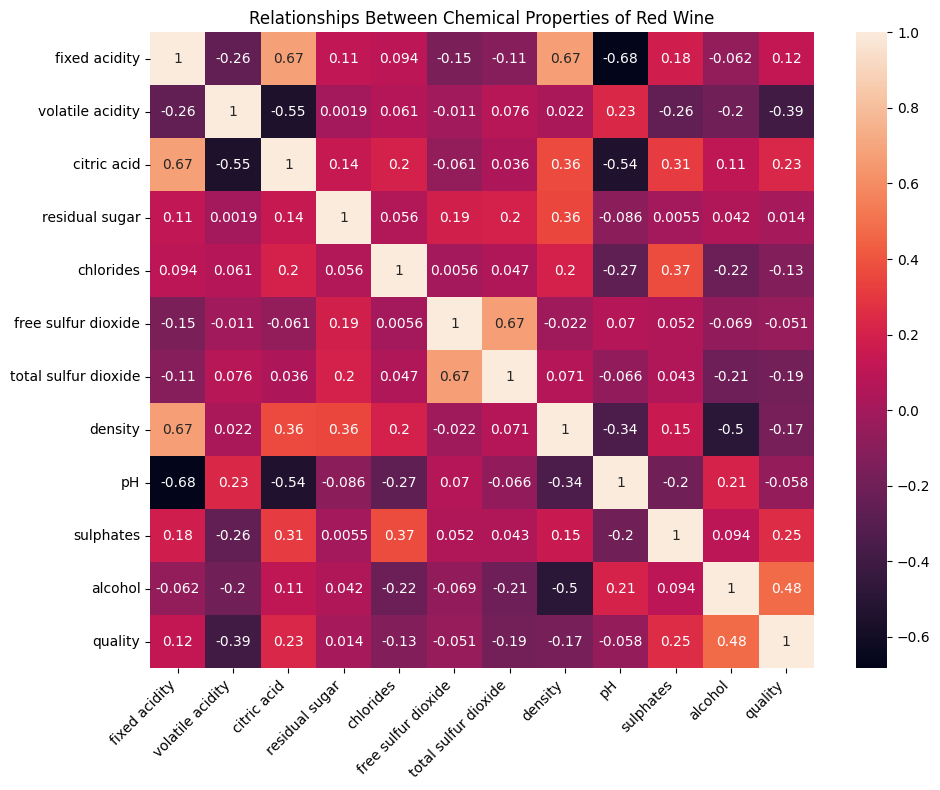

In [3]:
# Put your code here
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
heatmap = sb.heatmap(red.corr(), annot = True)
plt.xticks(rotation=45, ha='right')
plt.title("Relationships Between Chemical Properties of Red Wine")
plt.tight_layout()
heatmap

&#9989;  **Question 2.4 (4 points)**: Let’s investigate which features of white wines now are correlated by plotting a correlation heatmap using Seaborn. Create a heatmap to visualize the relationships between various chemical properties of red wine.

Remember to rotate the tick labels so they are easy to read, and use tight_layout() to avoid any label cut-offs.
Which features are different between red and white?

<Axes: title={'center': 'Relationships Between Chemical Properties of White Wine'}>

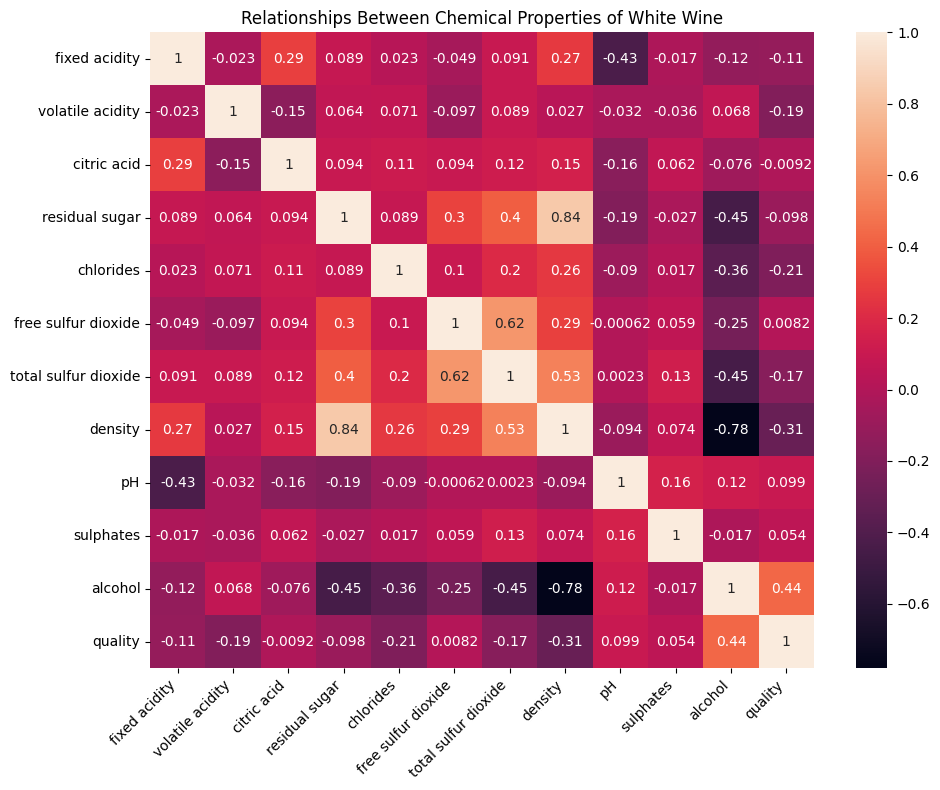

In [4]:
# Put your code here
plt.figure(figsize=(10, 8))
heatmap_white = sb.heatmap(white.corr(), annot = True)
plt.xticks(rotation=45, ha='right')
plt.title("Relationships Between Chemical Properties of White Wine")
plt.tight_layout()
heatmap_white

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
## Part 3: One Variable Linear Regression (21 points)

In exploring the characteristics of wine, understanding the relationship between individual chemical components can provide insights into the wine’s flavor profile, quality, and potential fermentation properties. One simple yet valuable analysis is examining the relationship between citric acid and fixed acidity.

Citric acid, a natural preservative that adds freshness, often contributes to the tartness and overall acidity in wine. Meanwhile, fixed acidity is a broader measure that includes acids, such as tartaric and malic acid, giving wine its sharp, crisp taste. By performing a single-variable linear regression with citric acid as the predictor for fixed acidity, we can investigate whether higher levels of citric acid are associated with an increase in fixed acidity, potentially indicating a specific acid balance characteristic to certain wine types.

This regression analysis can reveal subtle patterns in acidity management, helping winemakers predict and control acidity levels for quality consistency, and giving scientists insight into how specific acid types interact in the broader context of wine chemistry.

&#9989;  **Question 3.1 (3 points)**: Using the OLS method in `statsmodels`, perform a linear regression to predict the fixed acidity of a wine sample using its citric acid content and display the results summary. Remember that you may need to use the add_constant() method to ensure OLS fits a general line  y = ax + b  to the data rather than a line through the origin  y = ax .

For this problem, make sure that you’re using the entire wine dataset, not just a subset of the data. So the first part should be to make a combined dataframe (using `pd.concat`) out of white and red

In [5]:
# Put your code here
import statsmodels.api as sm
red["class"] = "red" # Added 'class' feature to differentiate in part 3.56
white["class"] = "white"
wine = pd.concat([red, white])
y = wine["fixed acidity"]
x = wine["citric acid"]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed acidity   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     764.1
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          4.19e-159
Time:                        22:30:28   Log-Likelihood:                -10544.
No. Observations:                6497   AIC:                         2.109e+04
Df Residuals:                    6495   BIC:                         2.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.2931      0.037    171.614      0.000       6.221       6.365
citric acid     2.8944      0.105     27.642      0.000       2.689       3.100
==============================================================================
Omnibus:                     1737.242   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5414.227
Skew:                           1.364   Prob(JB):                         0.00
Kurtosis:                       6.544   Cond. No.                         7.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 3.2 (3 points)**: Answer the following questions: 

1.	What was the equation of the best-fit linear relationship between a red wine’s fixed acidity and its citric acid content?
2.	As a red wine’s citric acid content increases, does its fixed acidity increase or decrease? What aspect of the regression output tells you this?
3.	Based on the  p -value for citric acid, is the relationship you found between a wine’s fixed acidity and citric acid content statistically significant? Justify your answer.

<font size=+3>&#9998;</font> The questions here ask about red wine, but the question asking us to create the model specifies us to concatenate the datasets? 
1. y = 2.89x+6.29
2. As the wines' citric acid content increases, so does its fixed acidity based on the positive slope (coefficient of x or citric acid variable)
3. The p-values being 0, indicated the relationship is statistically significant. This makes since that an increase in one type of acidity would increase the overall acidity of the wine.

&#9989; **Question 3.3 (4 points, 2 points per part)**: Now, let's perform linear regression separately for red and white wine. To avoid confusion and ensure that results are not overwritten, make sure that the variable names for the OLS models and results are different for each wine type.

&#9989; **Question 3.3.Red (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the **fixed acidity** of red wine samples using **citric acid** as the predictor, and display the results summary.



In [6]:
# Put your code here
red_y = red["fixed acidity"]
red_X = red["citric acid"]
red_X = sm.add_constant(red_X)
red_model = sm.OLS(red_y,red_X).fit()
red_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed acidity   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     1313.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          2.54e-210
Time:                        22:30:29   Log-Likelihood:                -2675.4
No. Observations:                1599   AIC:                             5355.
Df Residuals:                    1597   BIC:                             5365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.6928      0.055    121.051      0.000       6.584       6.801
citric acid     6.0036      0.166     36.234      0.000       5.679       6.329
==============================================================================
Omnibus:                       70.108   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.822
Skew:                           0.239   Prob(JB):                     1.62e-36
Kurtosis:                       4.499   Cond. No.                         5.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **Question 3.3.White (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the **fixed acidity** of white wine samples using **citric acid** as the predictor, and display the results summary.

In [7]:
# Put your code here
white_y = white["fixed acidity"]
white_X = white["citric acid"]
white_X = sm.add_constant(white_X)
white_model = sm.OLS(white_y,white_X).fit()
white_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed acidity   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     446.8
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           5.62e-95
Time:                        22:30:29   Log-Likelihood:                -5904.1
No. Observations:                4898   AIC:                         1.181e+04
Df Residuals:                    4896   BIC:                         1.183e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.1809      0.034    182.293      0.000       6.114       6.247
citric acid     2.0165      0.095     21.137      0.000       1.829       2.203
==============================================================================
Omnibus:                      504.721   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1173.467
Skew:                           0.620   Prob(JB):                    1.53e-255
Kurtosis:                       5.052   Cond. No.                         9.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **Question 3.4 (5 points)**: Answer the following questions:

1. For both red and white wines, what is the equation of the best-fit linear relationship between **fixed acidity** and **citric acid**?

2. For both red and white wines, as citric acid content increases, does the fixed acidity increase or decrease?

3. Based on the \( p \)-values for citric acid, is the relationship between fixed acidity and citric acid content statistically significant for each wine type?

<font size=+3>&#9998;</font> 
1. y is fixed acidity, x is citric acid
   - Red wine: y = 6x + 6.69
   - White wine: y = 2.01x + 6.18
3. For both wines, an increase in citric acid content results in an increase in fixed acidity
4. The p-values for both wines citric acid levels are 0, showing there is a statistically significant relationship for each wine type

&#9989; **Question 3.5 (6 points)**: Assuming you did everything correctly, the relationship between a wine's **fixed acidity** and **citric acid** content may differ when you split the data by wine type (red or white). This might seem confusing at first. Part of the reason for this is because we skipped a very important step when working with unfamiliar data: **visualizing the data**.

**Do this**: Make a scatterplot showing **fixed acidity** vs. **citric acid** for the wine dataset. Color-code the points so that red and white wines are in different colors. Then, display the best fit line for each type of wine in the same color as the points, and also display the best fit line for all wines combined in a different color. Don’t forget to label your axes. When you’re done, your plot should contain two colors of points and three lines (two lines should match the colors of the two wine types, and one line for the combined data in a different color).

**Hint**: We've included a function to help you plot a line. Feel free to use it, or not.

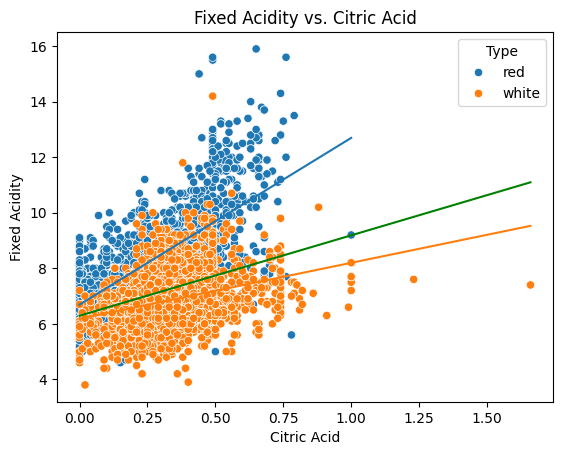

In [8]:
# Put your code here
import matplotlib.pyplot as plt
import numpy as np
def plot_line(slope, intercept, xmin, xmax, color):
    xline = np.array([xmin,xmax])
    yline = slope*xline+intercept
    plt.plot(xline,yline,color)

sb.scatterplot(data = wine, x = "citric acid", y = "fixed acidity", hue = "class")
plt.xlabel("Citric Acid")
plt.ylabel("Fixed Acidity")
plt.title("Fixed Acidity vs. Citric Acid")
plt.legend(title = "Type")
# For red wine
plot_line(6.0036, 6.6928, red["citric acid"].min(), red["citric acid"].max(),
          color = "#1f77b4")
# For white wine
plot_line(2.0165, 6.1809, white["citric acid"].min(), white["citric acid"].max(),
          color = "#ff7f0e")
# For both wines
plot_line(2.894, 6.293, wine["citric acid"].min(), wine["citric acid"].max(),
          color = "green")

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

## Part 4: Multiple Regression (16 points)

In this part, we'll use multiple features to predict the **quality** of **red** wine samples. Specifically, we’ll explore how a combination of chemical properties—such as **volatile acidity**, **citric acid**, **alcohol**, and others—can be used to estimate the overall **quality** rating of red wines.

&#9989; **Question 4.1 (3 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the **quality** of wine based on **volatile acidity**, **citric acid**, and **alcohol content**. Be sure to use the `add_constant()` method to ensure `OLS` includes a constant term in the model. As before, make sure to **display a summary of your results**.

In [9]:
# Put your code here
y = red["quality"]
x = red[["volatile acidity", "citric acid", "alcohol"]]
X = sm.add_constant(x)
red_model = sm.OLS(y,X).fit()
red_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     247.0
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.29e-131
Time:                        22:30:31   Log-Likelihood:                -1621.6
No. Observations:                1599   AIC:                             3251.
Df Residuals:                    1595   BIC:                             3273.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0553      0.194     15.722      0.000       2.674       3.436
volatile acidity    -1.3429      0.114    -11.818      0.000      -1.566      -1.120
citric acid          0.0678      0.103      0.659      0.510      -0.134       0.270
alcohol              0.3138      0.016     19.602      0.000       0.282       0.345
==============================================================================
Omnibus:                       17.039   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.901
Skew:                          -0.068   Prob(JB):                     2.37e-06
Kurtosis:                       3.608   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **Question 4.2 (4 points)**: Answer the following questions:

1. Suppose a red wine sample has a volatile acidity of 0.52, citric acid content of 0.27, and alcohol of 10.0. What does your linear model predict for the wine's quality rating? Explain how you arrived at your answer.

2. For each of the features (volatile acidity, citric acid, and alcohol), specify if it is statistically significant in the model. Briefly justify your answers.

In [10]:
def quality_red(volatile_acidity, citric_acid, alcohol):
    y = (-1.3429) * volatile_acidity + (0.0678) * citric_acid + (0.3138) * alcohol + 3.0553
    print(y)
quality_red(0.52, 0.27, 10)

5.513298000000001


<font size=+3>&#9998;</font>
1. I plugged in the coefficients of the variables (volatile acidity, citric acid, and alcohol) and the provided values of the variables into the linear regression equation, which resulted in a predicted quality of 5.51
2. P-values
   - Volatile Acidity: 0, means it is statistically significant
   - Citric acid: 0.51, means it is NOT statistically significant
   - Alcohol: 0, means it is statistically significant

&#9989;  **Question 4.3 (3 points)**: Perform the same multivariable linear regression again, but this time check for chemicals and check if that improves the quality determination. Display the summary of these results.

**What does this question mean? I don't know what its asking (Question 4.3)**

In [11]:
# Put your code here
# Original Model I am assuming
x = red.drop(columns=["quality", "class"])
X = sm.add_constant(x)
red_model = sm.OLS(y,X).fit()
red_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.79e-145
Time:                        22:30:33   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Put your code here
# Reduced Model I guess
x = red[["volatile acidity", "chlorides", "alcohol", "free sulfur dioxide",
         "total sulfur dioxide", "pH", "sulphates"]]
X = sm.add_constant(x)
red_model = sm.OLS(y,X).fit()
red_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          5.32e-149
Time:                        22:30:33   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301      0.403     10.995      0.000       3.640       5.220
volatile acidity        -1.0128      0.101    -10.043      0.000      -1.211      -0.815
chlorides               -2.0178      0.398     -5.076      0.000      -2.798      -1.238
alcohol                  0.2893      0.017     17.225      0.000       0.256       0.322
free sulfur dioxide      0.0051      0.002      2.389      0.017       0.001       0.009
total sulfur dioxide    -0.0035      0.001     -5.070      0.000      -0.005      -0.002
pH                      -0.4827      0.118     -4.106      0.000      -0.713      -0.252
sulphates                0.8827      0.110      8.031      0.000       0.667       1.098
==============================================================================
Omnibus:                       24.204   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.245
Skew:                          -0.156   Prob(JB):                     2.22e-08
Kurtosis:                       3.657   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 4.4 (4 points)**: Answer these questions: 

1. Qualitatively, how much better/worse is the reduced model compared to the original model? Briefly justify your answer.

2. Explain in your own words why we might want to use a model with fewer features, even if it fits the data a bit worse than a model with more features.

<font size=+3>&#9998;</font>
1. The reduced model performs slightly worse than the original based on the R-squared values of 0.361 in the original, which is 0.02 more than the reduced model
2. A model with fewer features might be more desirable because it makes it easier to apply predictions in the real world and is less complex (less prone to over-fitting) despite it possibly being less accurate than a model with more features

&#9989; **Question 4.5 (2 points)**: Suppose we wanted to use the **color** of a wine (red or white) as a feature to predict its quality. Will simply including the `color` column in the second argument to `OLS()` work? If not, why, and what could we do to fix it?

<font size=+3>&#9998;</font> Including a color feature would not work because the OLS() argument requires numbers, so it cannot take in string values. To fix this you could assign number values to the wine classes

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

## Part 5: Logistic Regression (16 points)

In this part, we'd like to use logistic regression to classify whether a wine is **red** or **white** based on its chemical properties. Logistic regression, as we've learned in class, is commonly used for binary classification. Here, we’ll use it to distinguish between the two wine types, aiming for high accuracy in prediction, as mistaking one for the other could lead to a poor wine pairing experience!

&#9989; **Question 5.1 (4 points)**: Let's start by setting up a classifier to distinguish **red wines** from **white wines**.

**Do This**: Add a new column called `color` to both the red and white wine DataFrames. For red wine samples, set `color` to 1, and for white wine samples, set `color` to 0. Then, use `pd.concat()` to combine the two DataFrames into one unified DataFrame.

**Hint**: After creating the `color` column in each DataFrame, use `pd.concat([df_red, df_white])` to concatenate them into a single DataFrame.

Finally, split the combined DataFrame into **features** and **labels**, where `features` consists of all columns except `color` and `quality`, and `labels` is the `color` column.

In [13]:
# Put your code here
red["color"] = 1
white["color"] = 0
# red = red.drop(columns = ["class"]) # Removing "class" feature since it contains strings
# white = white.drop(columns = ["class"])
wine1 = pd.concat([red, white])
features = wine1.drop(columns = ["color", "quality"])
labels = wine1["color"]

&#9989;  **Question 5.2 (4 points)**: Split your data into a training and testing set with a training set representing 75% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [18]:
# Put your code here
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,
                                                                            train_size = 0.75,
                                                                            random_state = 0)

# Code generated by OpenAI ChatGPT 4o, access on November 15, 2024, https://chatgpt.com/c/67362c64-7104-8001-b9bf-375901089a64
# Prompt Chain: Why am I getting an error when I drop the class feature?
train_features = train_features.drop(columns=["class"], errors="ignore")
train_labels = train_labels.drop(columns=["class"], errors="ignore")
test_features = test_features.drop(columns=["class"], errors="ignore")
test_labels = test_labels.drop(columns=["class"], errors="ignore")
# print(train_features.dtypes) 
# print(train_labels.dtypes)
# End of ChatGPT 4o code

print(f"Training features shape: {train_features.shape}")
print(f"Testing features shape: {test_features.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training features shape: (4872, 11)
Testing features shape: (1625, 11)
Training labels shape: (4872,)
Test labels shape: (1625,)


&#9989;  **Question 5.3 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [19]:
# Put your code here
logit_model = sm.Logit(train_labels, sm.add_constant(train_features)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.031695
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  color   No. Observations:                 4872
Model:                          Logit   Df Residuals:                     4860
Method:                           MLE   Df Model:                           11
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                  0.9434
Time:                        22:31:38   Log-Likelihood:                -154.42
converged:                       True   LL-Null:                       -2727.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2468.0852    237.382    -10.397      0.000   -2933.345   -2002.825
fixed acidity           -0.8873      0.272     -3.266      0.001      -1.420      -0.355
volatile acidity         4.5610      1.125      4.056      0.000       2.357       6.765
citric acid             -2.0137      1.429     -1.409      0.159      -4.814       0.787
residual sugar          -0.9796      0.112     -8.732      0.000      -1.199      -0.760
chlorides               21.7935      4.582      4.756      0.000      12.813      30.774
free sulfur dioxide      0.0674      0.015      4.579      0.000       0.039       0.096
total sulfur dioxide    -0.0533      0.006     -9.377      0.000      -0.064      -0.042
density               2471.4338    240.825     10.262      0.000    1999.426    2943.442
pH                      -3.5974      1.651     -2.179      0.029      -6.834      -0.361
sulphates                1.5223      1.404      1.084      0.278      -1.229       4.274
alcohol                  2.9143      0.372      7.835      0.000       2.185       3.643
========================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

&#9989;  **Question 5.4 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [21]:
# Put your code here
predictions = logit_model.predict(sm.add_constant(test_features))
predictions = (predictions > 0.5).astype(int)
accuracy = (predictions == test_labels).mean()
print(f"Percentage of correct predictions: {accuracy * 100:.2f}%")

Percentage of accurate predictions: 99.38%


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University